In [ ]:
#ResNet Model

!pip install imutils

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
dataset = "/content/sample_data/covid19-chest-xray-image-dataset"

In [ ]:
args={}
args["dataset"]=dataset

In [ ]:
import cv2
iPaths = list(paths.list_images(args["dataset"])) # image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2] # split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert images into RGB Channel
    image = cv2.resize(image, (224, 224)) # Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"

In [ ]:
if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")

['normal', 'covid', '.ipynb_checkpoints']


In [ ]:
import os

Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))

Normal Chest X-ray Vs Covid-19 Chest X-ray


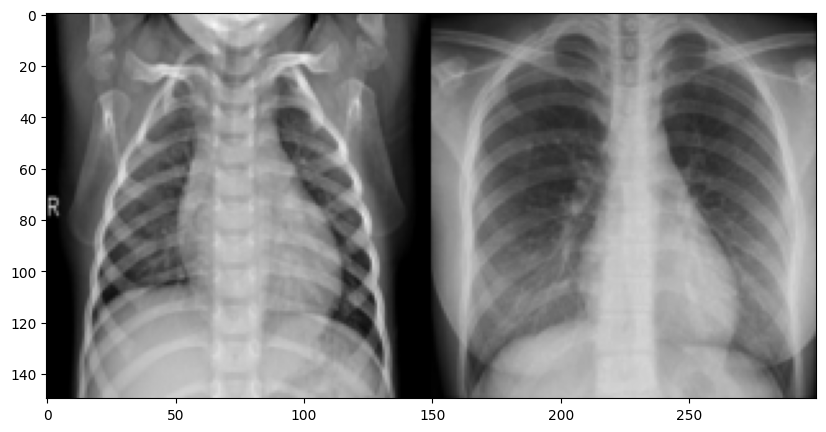

Normal Chest X-ray Vs Covid-19 Chest X-ray


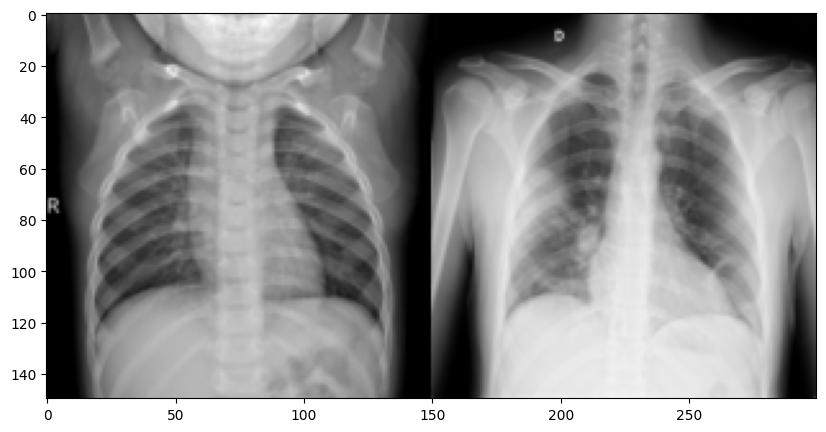

Normal Chest X-ray Vs Covid-19 Chest X-ray


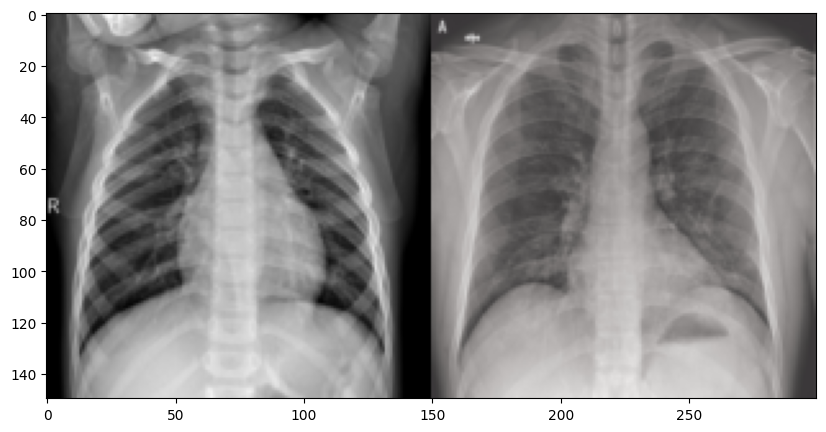

Normal Chest X-ray Vs Covid-19 Chest X-ray


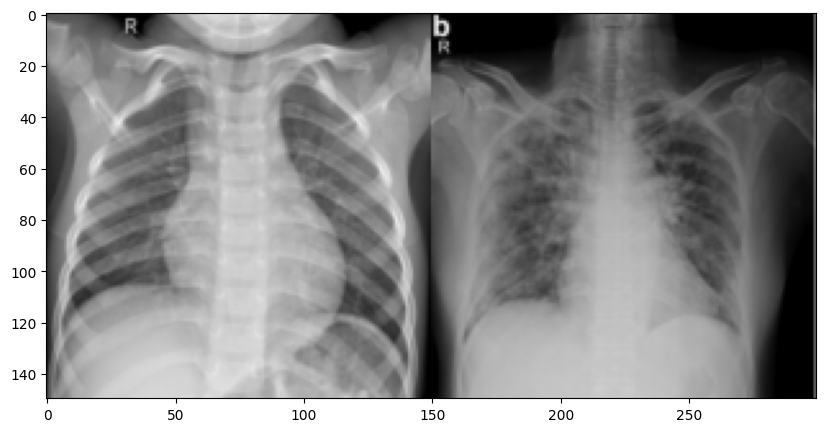

Normal Chest X-ray Vs Covid-19 Chest X-ray


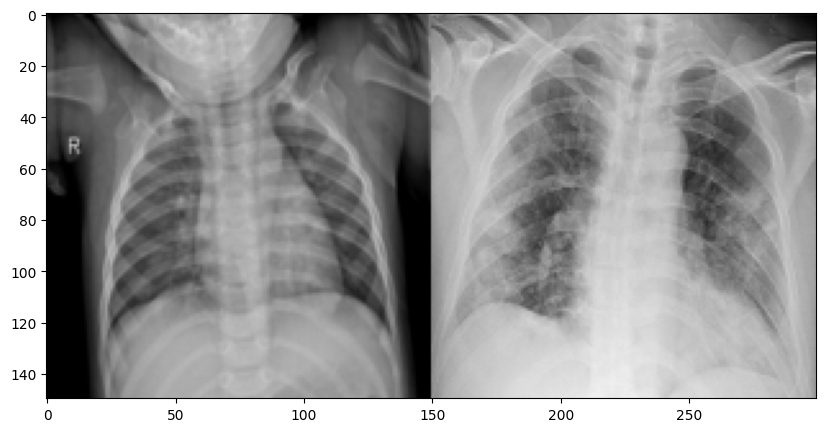

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

def plotter(i):
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = skimage.transform.resize(normal, (150, 150, 3))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode='reflect')

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)

In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model = base_model.output
model = AveragePooling2D(pool_size=(4, 4))(model)
model = Flatten(name="flatten")(model)
model = Dense(64, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="softmax")(model)
full_model = Model(inputs=base_model.input, outputs=model)
for layer in full_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((75, 224, 224, 3), (19, 224, 224, 3), (75, 2), (19, 2))

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


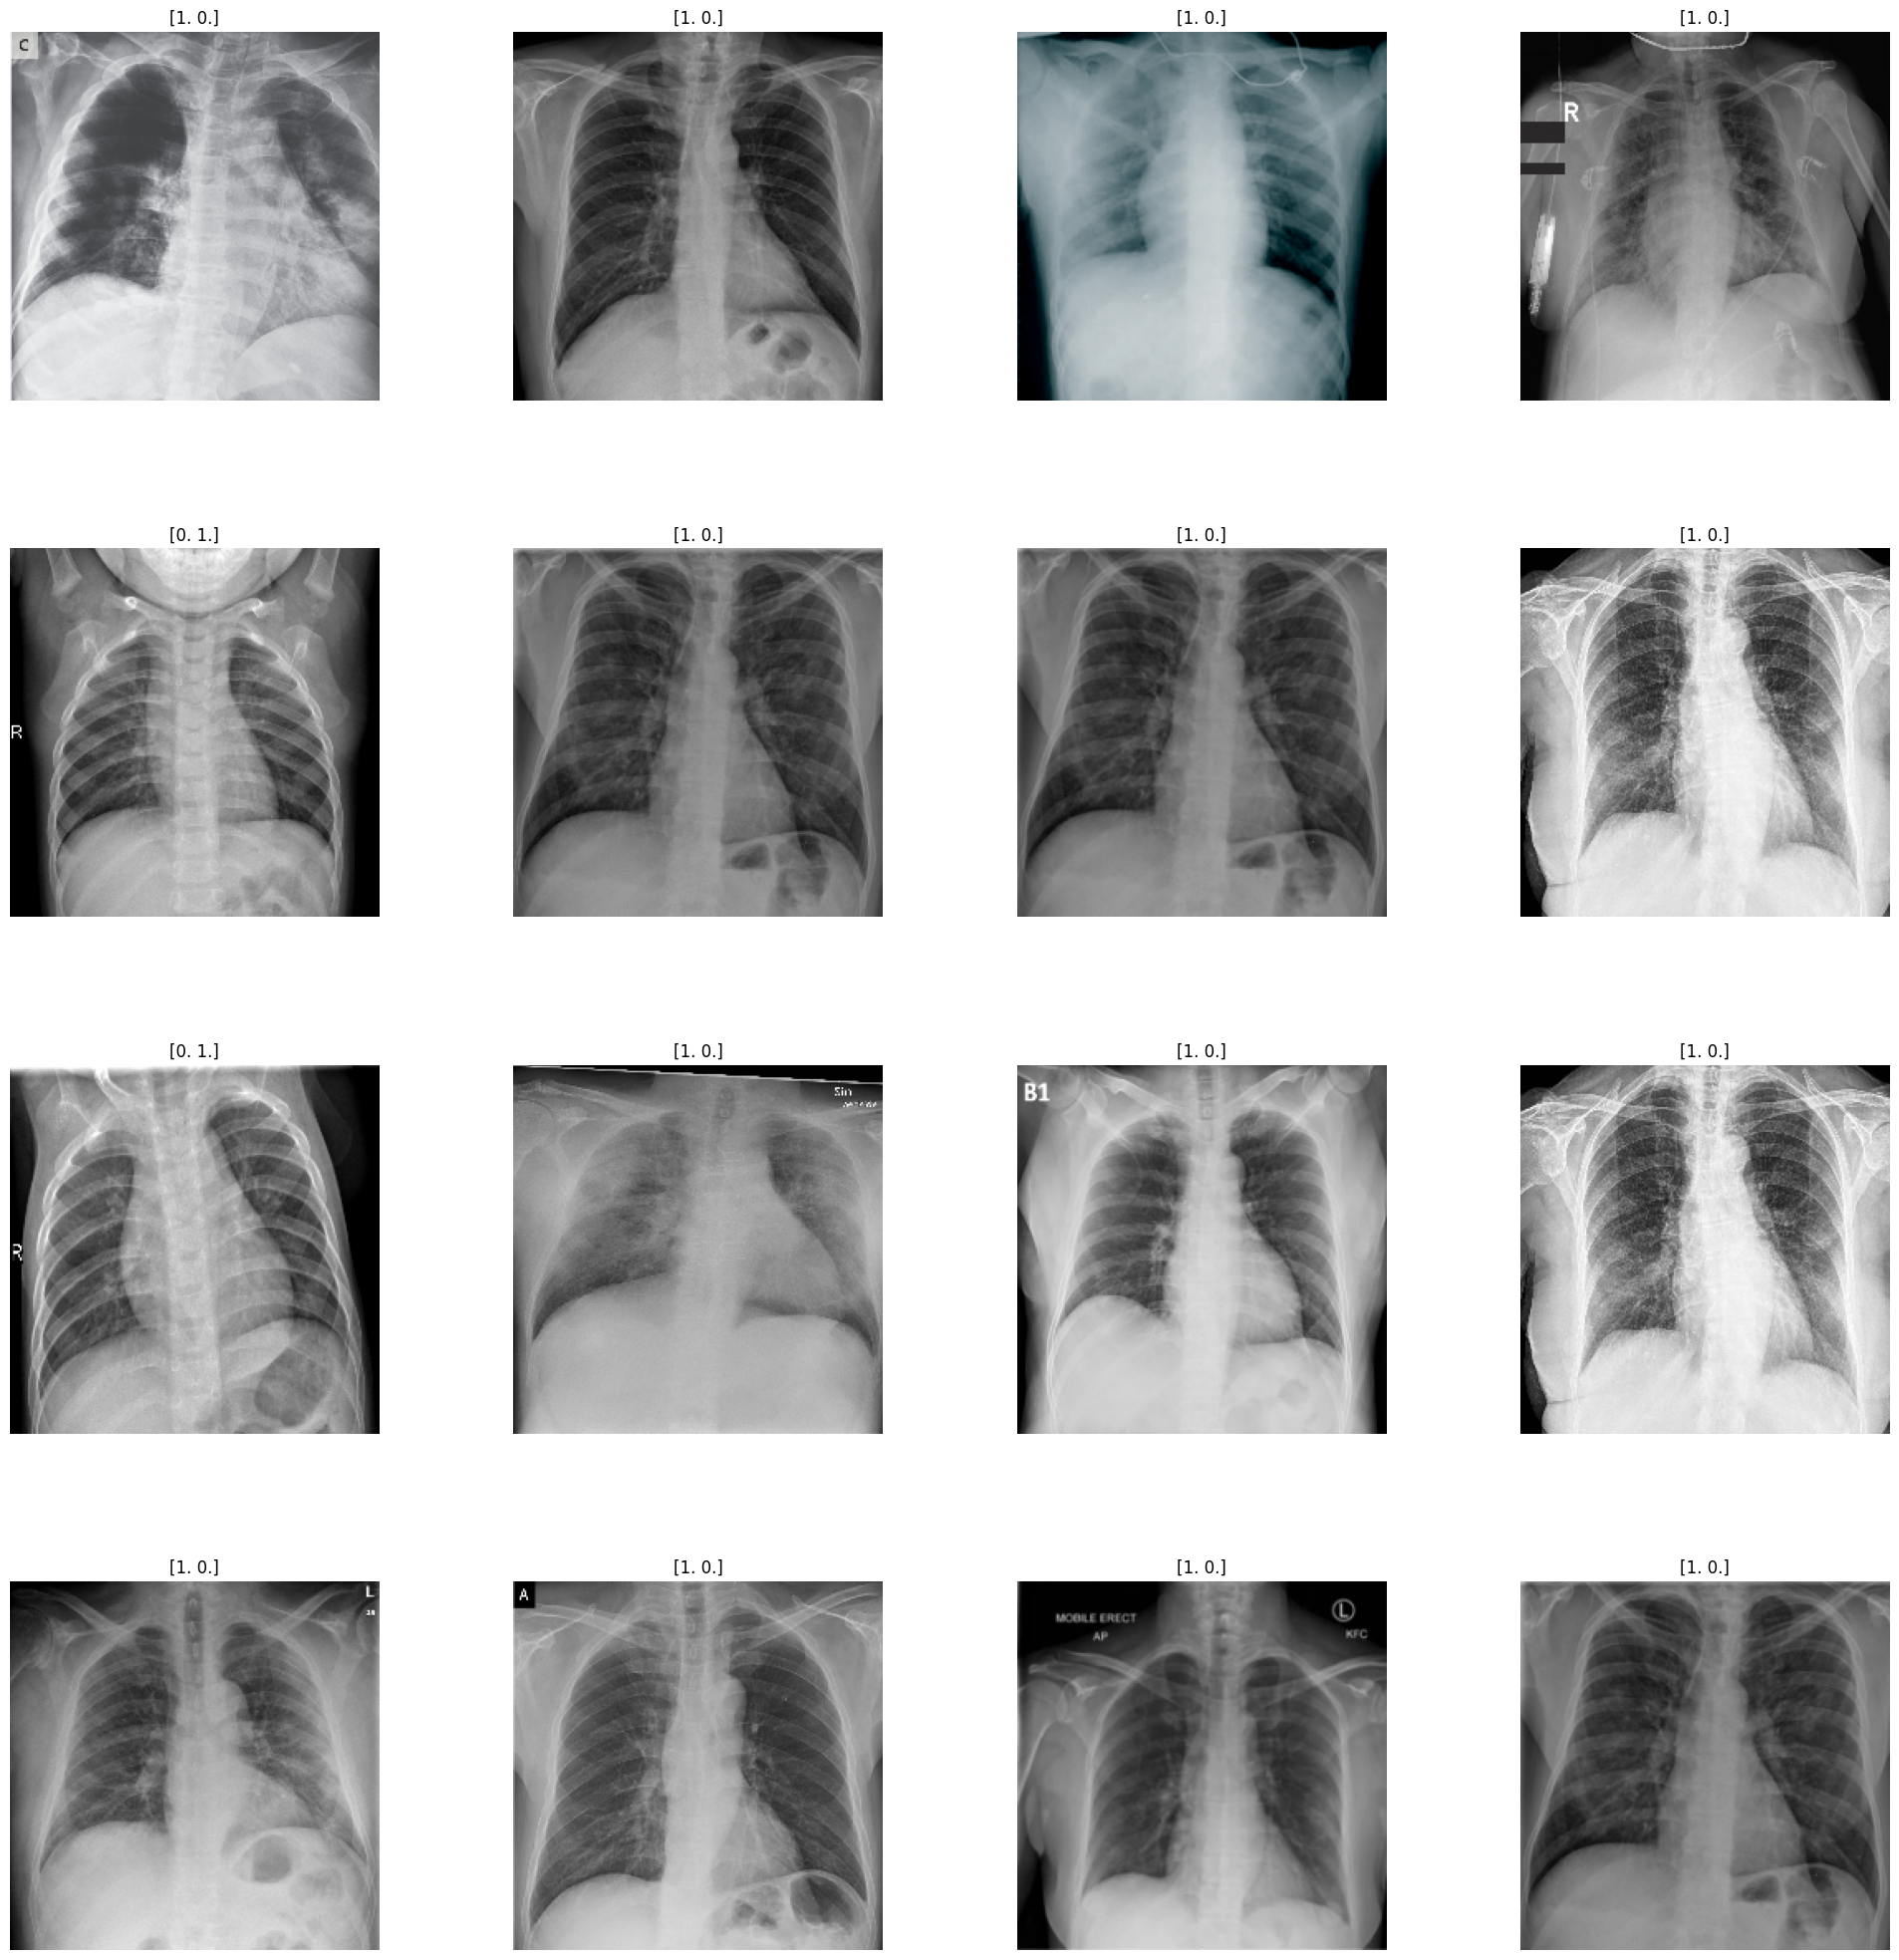

In [ ]:
W_grid = 4 # width
L_grid = 4 # length
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25)) # subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [ ]:
INIT_LR = 1e-3
EPOCHS = 30
BS = 8

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=INIT_LR)
full_model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("Compiling Starts")

R = full_model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS
)

Compiling Starts


<ipython-input-19-3e5e7511e160>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = full_model.fit_generator(


Epoch 1/30
9/9 [==============================] - 28s 3s/step - loss: 0.7081 - accuracy: 0.6716 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 2/30
9/9 [==============================] - 18s 2s/step - loss: 0.6491 - accuracy: 0.7313 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 3/30
9/9 [==============================] - 18s 2s/step - loss: 0.6419 - accuracy: 0.6716 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 4/30
9/9 [==============================] - 18s 2s/step - loss: 0.6976 - accuracy: 0.6418 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 5/30
9/9 [==============================] - 19s 2s/step - loss: 0.6922 - accuracy: 0.6716 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 6/30
9/9 [==============================] - 18s 2s/step - loss: 0.6982 - accuracy: 0.6418 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 7/30
9/9 [==============================] - 17s 2s/step - loss: 0.6949 - accuracy: 0.6119 - val_loss: 0.6345 - val_accuracy: 0.7368
Epoch 8/30
9/9 [==================

3/3 [==============================] - 9s 2s/step


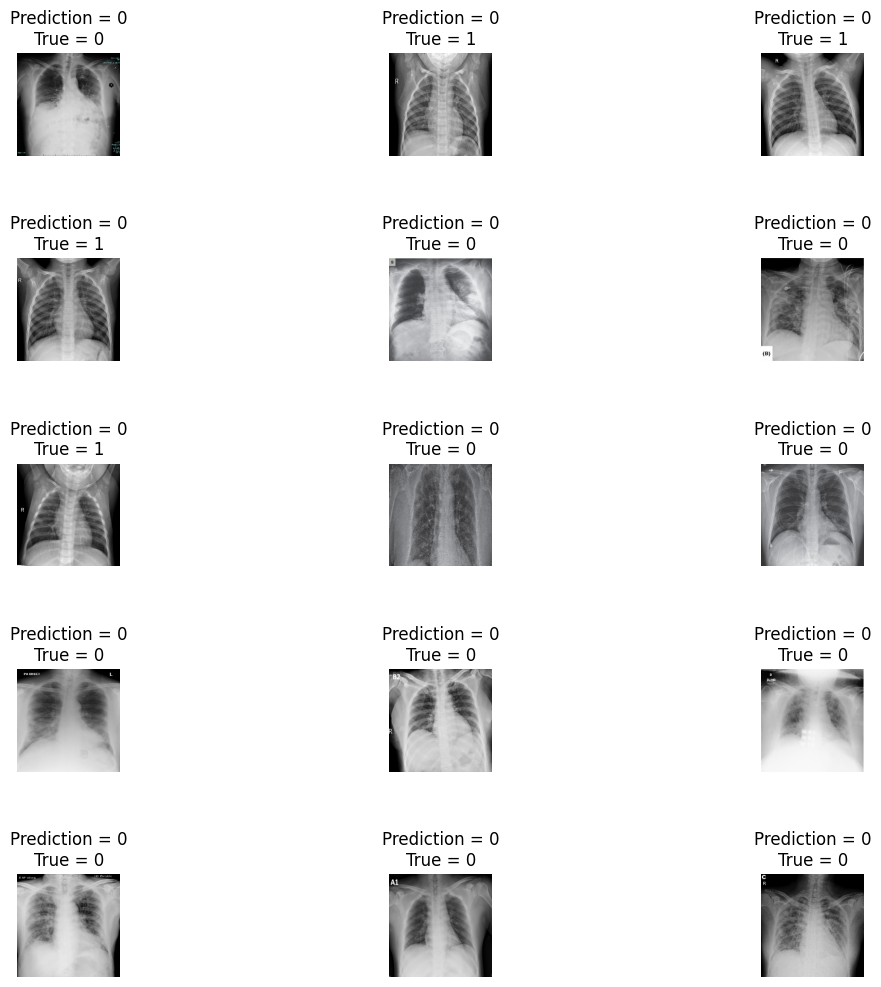

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = full_model.predict(X_test, batch_size=BS)
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i],
                                                          Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred = full_model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

3/3 [==============================] - 3s 928ms/step
              precision    recall  f1-score   support

       covid       0.74      1.00      0.85        14
      normal       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.7368421052631579

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[14  0]
 [ 5  0]]
acc: 0.7368
sensitivity: 1.0000
specificity: 0.0000


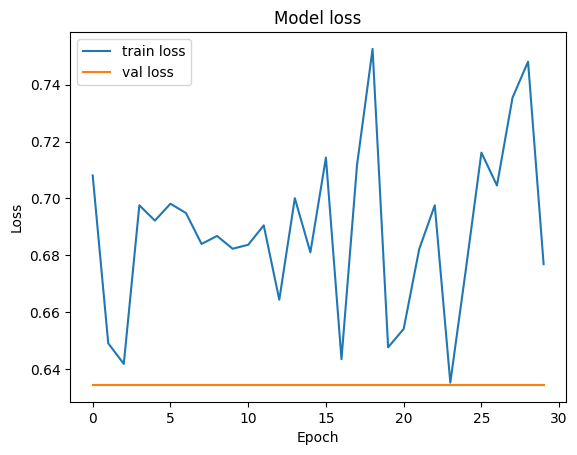

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

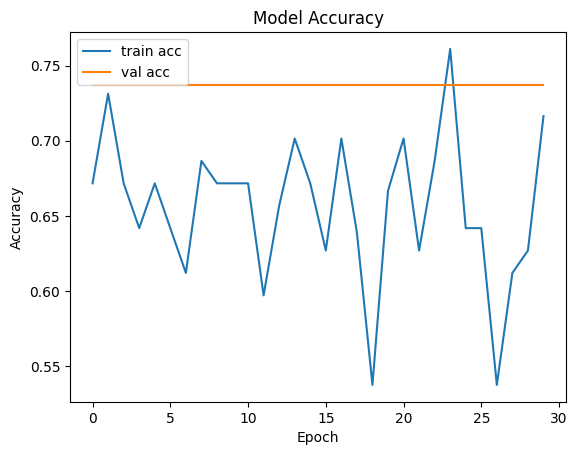

In [ ]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
full_model.save('Covid_model.h5')

1/1 [==============================] - 1s 1s/step
Prediction: Corona


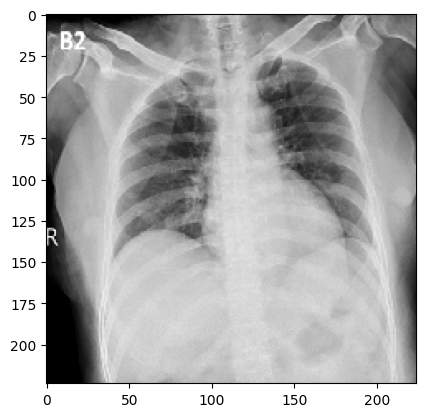

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from tensorflow.keras.applications.resnet50 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png', target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred[0] == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')

1/1 [==============================] - 1s 1s/step
Prediction: Normal


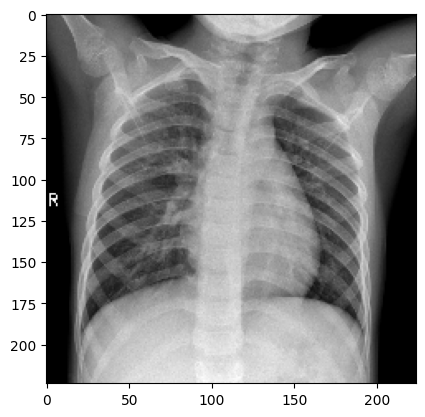

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from tensorflow.keras.applications.resnet50 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/normal/NORMAL2-IM-0397-0001.jpeg', target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred[0] == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')